# Spotify Genre Classifier

In [135]:
import pandas as pd

In [136]:
sp_data = pd.read_csv("test.csv")

In [137]:
# Histogram
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#plt.style.use('seaborn-whitegrid')
plt.style.use('seaborn-white')
len(sp_data)

,Song_Name,Artist,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Temp,Target
0,Under The Sun (with J. Cole & Lute feat. DaBaby),Dreamville,0.691,0.640,0,-6.441,0.369,0.5110,0.0,0.4090,0.163,138.672,1
1,"Down Bad (feat. JID, Bas, J. Cole, EARTHGANG &...",Dreamville,0.761,0.586,0,-5.368,0.359,0.0392,0.0,0.0558,0.719,149.804,1
2,LamboTruck (with Cozz feat. REASON & Childish ...,Dreamville,0.678,0.695,10,-5.323,0.286,0.0485,0.0,0.2540,0.242,135.044,1
3,Swivel (with EARTHGANG) - From The Upcoming Al...,Dreamville,0.507,0.545,2,-7.209,0.430,0.2500,0.0,0.2390,0.392,78.461,1
4,Oh Wow...Swerve (with J. Cole feat. Zoink Gang...,Dreamville,0.509,0.703,1,-6.097,0.512,0.3900,0.0,0.2690,0.301,174.259,1


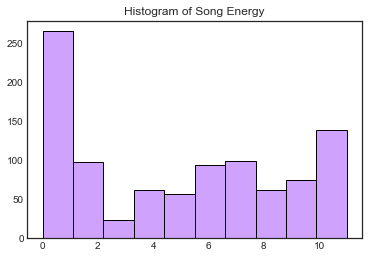

In [138]:
x = sp_data["Key"]
fig, ax = plt.subplots()
ax.hist(x, color = 'xkcd:lilac', edgecolor='black')
ax.set(title="Histogram of Song Energy")
plt.show()

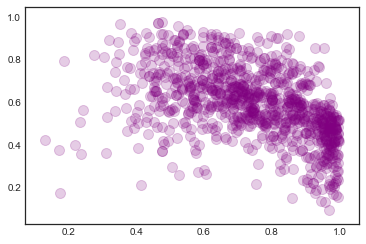

In [139]:
plt.scatter( sp_data["Energy"], sp_data["Danceability"], marker='o', color = 'purple', s = 100, alpha=.2)
plt.show()

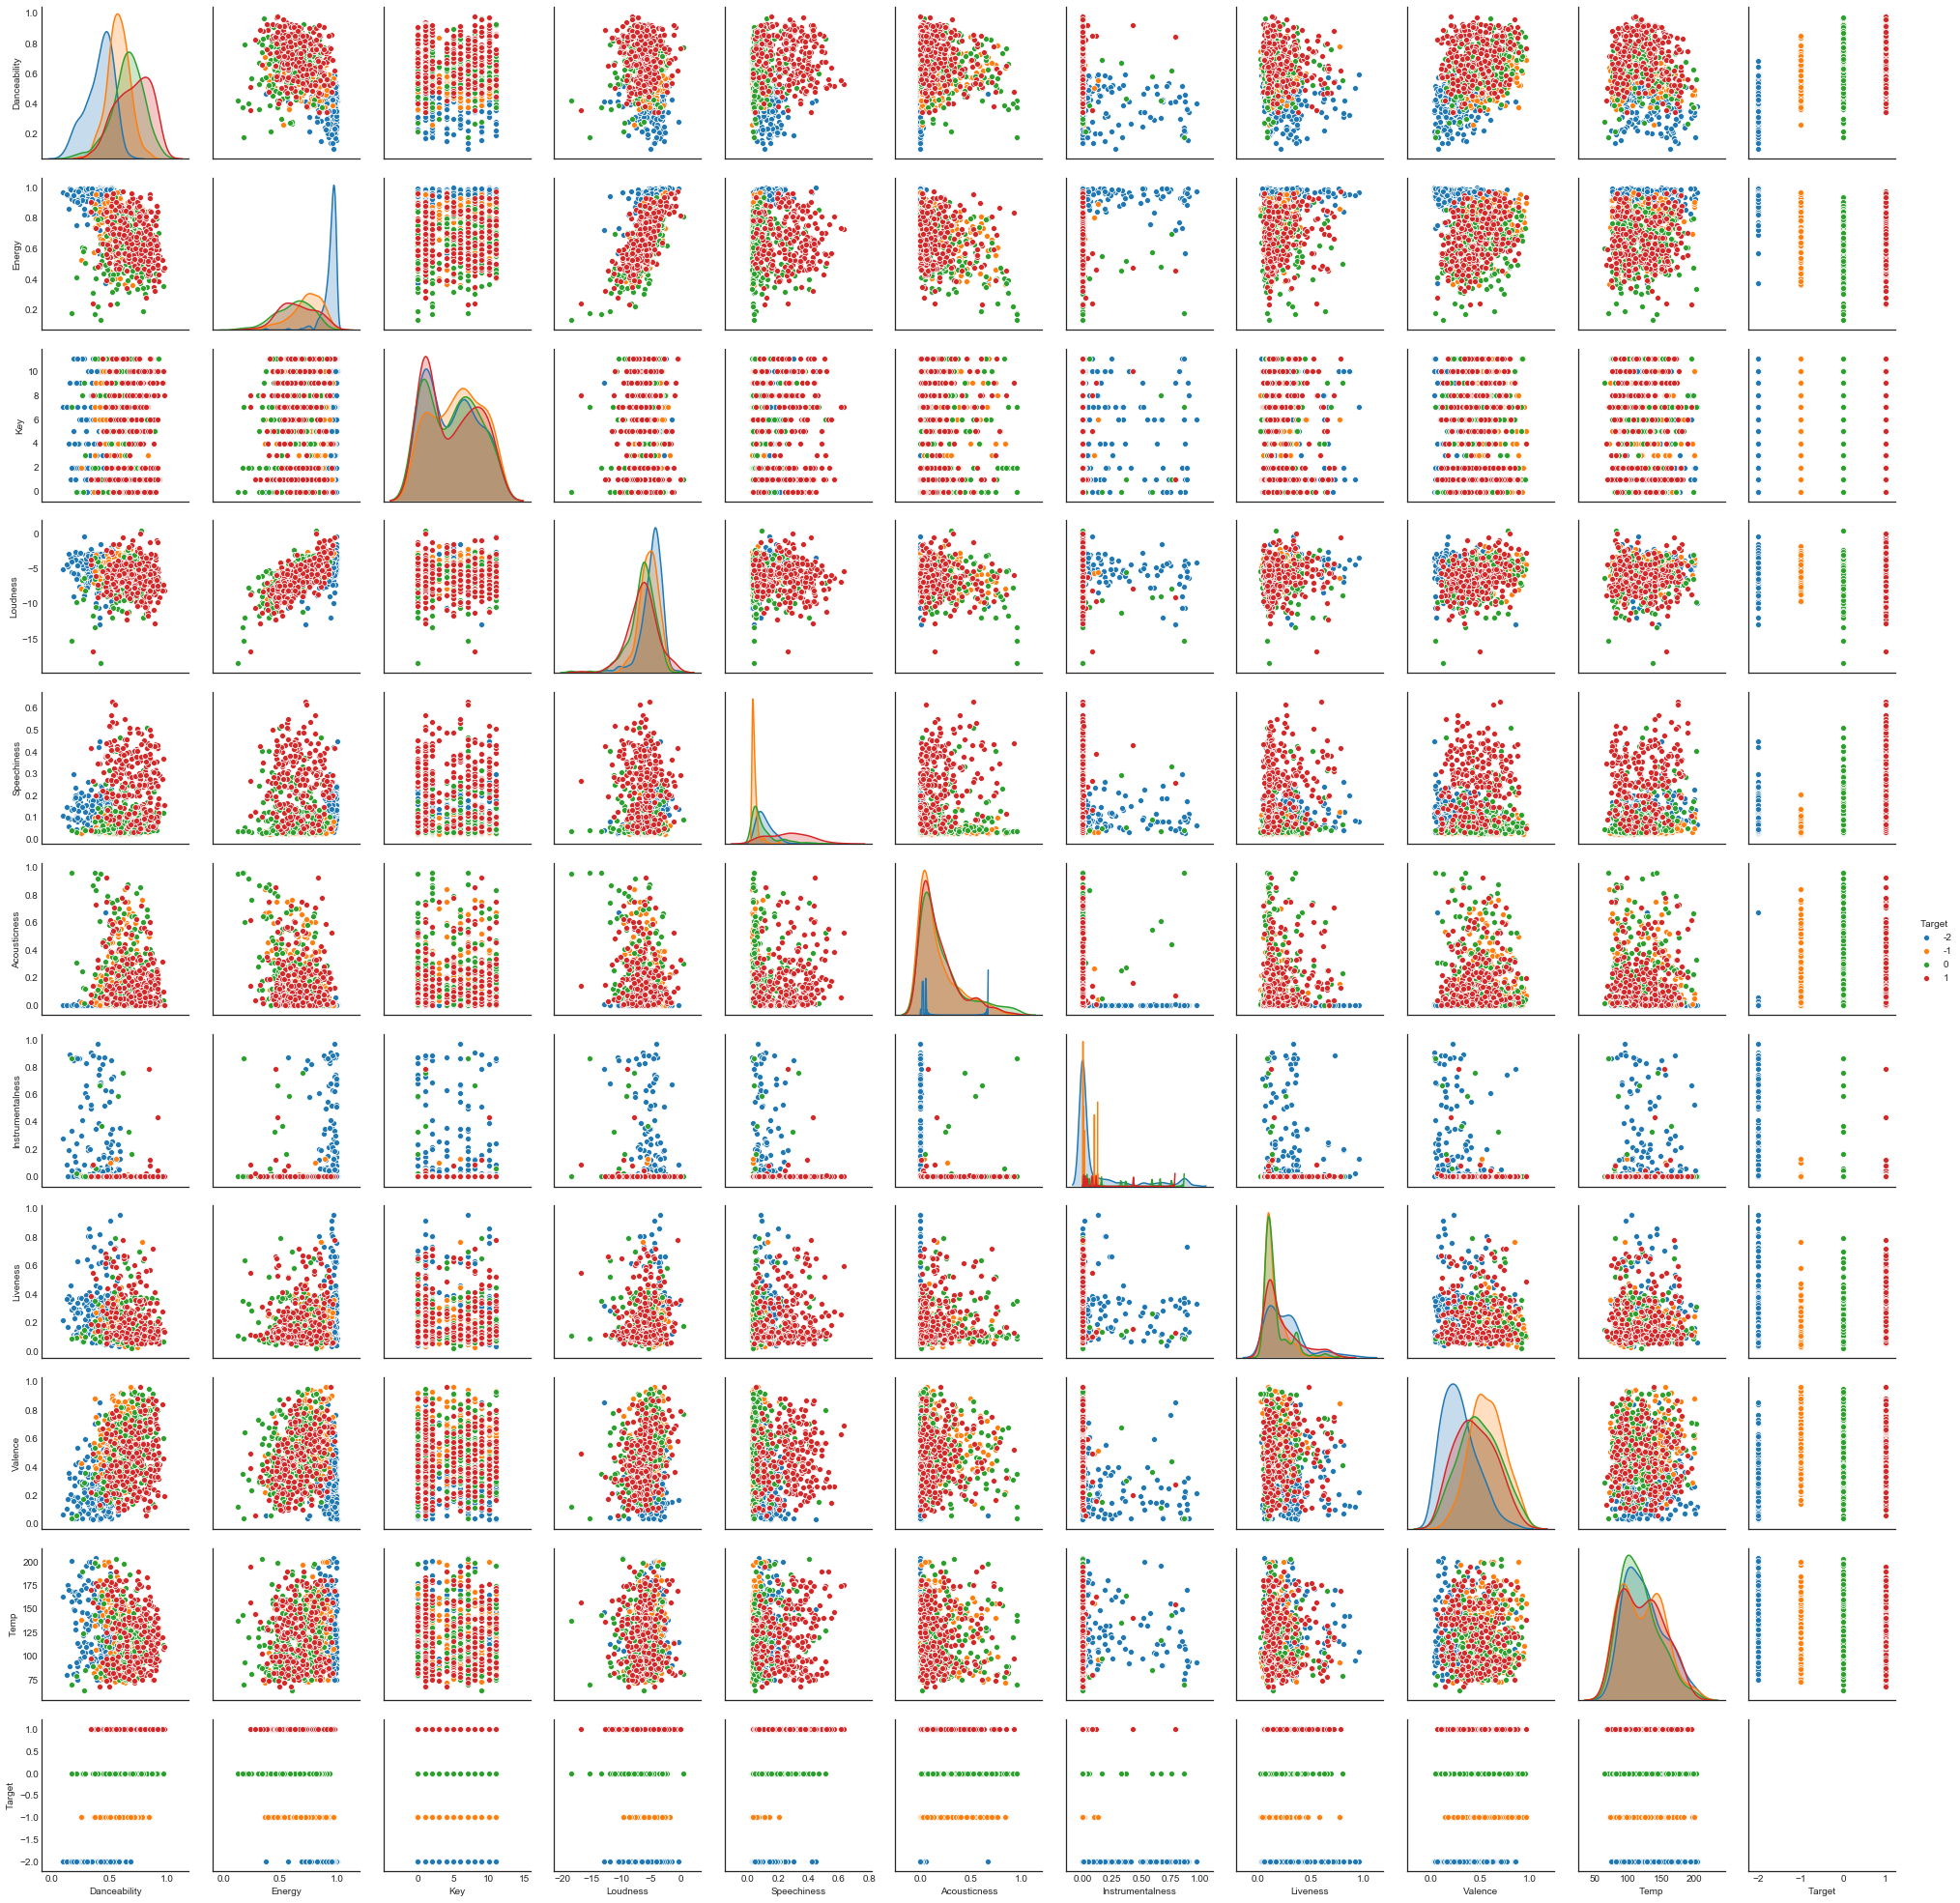

In [140]:
import seaborn as sns
features = ["Danceability","Energy","Loudness","Speechiness","Acousticness","Instrumentalness","Liveness","Valence","Temp"]
pair_plot = sns.pairplot(sp_data, hue='Target')


# iris_data['class'] = iris_data['class'].map({0:"Iris-setosa", 1:'Iris-versicolor', 2:'Iris-virginica'})
# pair_plot = sns.pairplot(iris_data, hue='class')

In [198]:
#Machine Learning

In [141]:
import pandas as pd

# hides Jupyter warnings
import warnings
warnings.filterwarnings('ignore')


In [142]:
#Splitting
from sklearn.model_selection import train_test_split
#Standardize
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
#["Danceability","Energy","Loudness","Speechiness","Acousticness","Instrumentalness","Liveness","Valence","Temp"]

X = sp_data[["Danceability","Energy","Key","Loudness","Speechiness","Acousticness","Instrumentalness","Liveness","Valence","Temp"]].values
y = sp_data['Target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

stdsc = StandardScaler()

X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

rf = RandomForestClassifier(n_estimators=10000, random_state=0)
rf.fit(X_train_std, y_train)

feature_importances = rf.feature_importances_

# feature importances will always sum to 1
print("Feature importances:\n{}".format(feature_importances))

most_important_features = pd.DataFrame(feature_importances.reshape(1,-1), columns=["Danceability","Energy","Key","Loudness","Speechiness","Acousticness","Instrumentalness","Liveness","Valence","Temp"], index = ["Importance"])
most_important_features


Feature importances:
[0.12393555 0.15586328 0.02778214 0.0561242  0.23489461 0.19148617
 0.04145844 0.04942689 0.07478224 0.04424648]


,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Temp
Importance,0.123936,0.155863,0.027782,0.056124,0.234895,0.191486,0.041458,0.049427,0.074782,0.044246


In [143]:
#["Danceability","Energy","Loudness","Speechiness","Acousticness","Instrumentalness","Liveness","Valence","Temp"]

#["Danceability","Energy","Loudness","Speechiness","Acousticness","Instrumentalness","Liveness","Valence"]

X = sp_data[["Danceability","Energy","Loudness","Speechiness","Acousticness","Instrumentalness","Liveness","Valence"]].values
y = sp_data['Target'].values

In [144]:
#Splitting
#Standardize
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

stdsc = StandardScaler()

X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [147]:
#Logistic Regression
# binary classifier
from sklearn.linear_model import LogisticRegression


log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.7538461538461538

In [148]:
#Support Vector Machine
from sklearn.svm import SVC
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.7794871794871795

In [149]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.676923076923077

In [150]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
tree.score(X_test, y_test)

0.6820512820512821

In [151]:
#K-nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.6205128205128205

In [154]:
#Neural Network
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(500)
nn.fit(X_train, y_train)
nn.score(X_test, y_test)

0.7794871794871795

In [664]:
nn.predict(X_test)

array([ 1,  1,  0,  0,  0,  0, -1,  1, -1, -2,  1,  1,  0,  0, -2, -1, -1,
       -2,  1,  0, -2,  0, -1,  1, -2, -2, -1, -2,  1, -1,  1, -1,  1,  1,
        0,  1,  0,  1, -2,  1, -1, -1,  0,  1,  1, -1, -2,  0, -2,  0, -1,
        0, -2,  1,  0, -1, -1,  1, -1,  0,  1,  1,  0, -2,  0, -1, -2, -2,
        0, -1,  0,  1,  0,  0, -1,  1, -1, -1,  0,  0,  0, -2, -2,  0, -1,
        0,  1, -2,  1,  0, -1, -2,  0, -2,  0, -1, -2,  0, -1,  0, -2, -1,
        0,  0,  0, -2, -1,  1, -1,  1, -1,  0,  0, -1,  1,  0, -2, -1, -2,
       -2,  0,  0, -2,  0, -1,  0, -2,  0,  1,  0, -1,  1,  0, -1,  0, -2,
        0,  0, -1,  0, -1,  0,  0, -2, -2, -1,  0,  0, -1,  0, -1,  0, -1,
        1, -1,  1,  0, -2,  1, -1,  1, -2, -2, -1, -2,  0,  0, -1, -2,  1,
        0,  0, -1, -1, -2,  1,  1, -1,  0, -2, -1, -1, -1,  0,  0, -1, -1,
        1, -2,  0, -1,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0, -1,  1,
       -2, -1,  1, -2, -2, -1,  1, -1, -2,  1, -1,  0,  0,  1,  1],
      dtype=int64)

In [665]:
y_test

array([ 1,  1,  1, -1, -1,  0, -1,  1, -1,  0,  1,  1,  0,  0, -2, -1, -1,
       -2,  0,  1, -2,  1, -1,  1, -2, -2,  0,  0,  1, -1,  0, -1,  1,  1,
        1,  1,  1,  1, -2,  1, -1,  0,  1,  1,  1, -1, -2,  0, -1,  0, -1,
        0, -2,  1,  0,  0, -1,  1, -1,  0,  1,  1,  0, -2,  1,  0,  1, -2,
       -1, -1,  0,  0,  0,  0, -1,  1, -1, -1, -1,  1,  1, -2, -2,  1,  0,
        0,  1, -2,  0,  1,  0, -2,  0, -2,  0, -1, -2,  0, -1,  0, -2, -1,
        0,  1, -1, -2,  0,  0,  1,  0, -1,  1,  1, -1,  1, -1, -2, -1, -2,
       -2,  1,  0, -2,  1,  0,  0, -2,  0,  1,  0, -1,  0,  1,  0,  0, -2,
        1,  1,  0,  0,  0,  0,  1, -2, -2, -1,  1,  0, -1, -2, -1,  0, -1,
        1, -1,  1,  0, -2,  0, -1,  0, -2, -2,  0,  1,  0,  0, -2, -2,  1,
        1,  0, -1, -1, -2,  1,  1, -1,  0, -2, -1, -1,  0,  0,  0, -2,  0,
        1, -2,  0, -1, -2,  0,  0,  0,  0,  1,  1, -1,  1, -1,  0,  0,  1,
       -2, -1,  1, -2, -2, -1,  1, -1, -2,  1, -1, -1,  0,  0,  1],
      dtype=int64)

In [155]:
tp_data = pd.read_csv("top50.csv")
TX = tp_data[["Danceability","Energy","Loudness","Speechiness","Acousticness","Instrumentalness","Liveness","Valence"]].values

In [156]:
TestData = nn.predict(TX)
TestData

array([ 0,  0,  0,  1,  0,  1,  0,  0,  0,  1,  0,  1,  1,  0,  0,  1, -1,
        1,  0,  0,  0,  1,  1, -1,  1,  0,  1,  1,  0,  1,  1,  0, -1, -1,
        0,  0,  0, -1,  0,  1,  0,  1,  0,  1, -1,  1,  0,  1,  1,  0],
      dtype=int64)

In [585]:
tp_data["Song_Name"] + "       " + tp_data["Artist"]

0                           Señorita       Shawn Mendes
1                         The Archer       Taylor Swift
2         Goodbyes (Feat. Young Thug)       Post Malone
3                                Ransom       Lil Tecca
4                               Truth Hurts       Lizzo
5     Money In The Grave (Drake ft. Rick Ross)      ...
6                                Panini       Lil Nas X
7     Sunflower - Spider-Man: Into the Spider-Verse ...
8      Beautiful People (feat. Khalid)       Ed Sheeran
9                                     Suge       DaBaby
10                    How Do You Sleep?       Sam Smith
11    The London (feat. J. Cole & Travis Scott)     ...
12                          bad guy       Billie Eilish
13                                     Lalala       Y2K
14             You Need To Calm Down       Taylor Swift
15    One Thing Right - feat. Kane Brown       Marsh...
16      Antisocial (with Travis Scott)       Ed Sheeran
17                Pop Out (feat. Lil Tjay)      